In [58]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact, IntSlider, Button

# 讀入 Keras 相關函數

In [59]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [73]:
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, concatenate, add
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

# 開始處理數據

In [61]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [62]:
print("training data 共 %d 訓練資料，每筆資料的尺寸為 %d x %d" %x_train0.shape)
print("testing data 共 %d 訓練資料，每筆資料的尺寸為 %d x %d" %x_test0.shape)

training data 共 60000 訓練資料，每筆資料的尺寸為 28 x 28
testing data 共 10000 訓練資料，每筆資料的尺寸為 28 x 28


## 1. 格式整理

In [63]:
x_train = x_train0.reshape((x_train0.shape[0], x_train0.shape[1]*x_train0.shape[2]))
x_test = x_test0.reshape((x_test0.shape[0], x_test0.shape[1]*x_test0.shape[2]))

## 2. 資料歸一化。 

In [64]:
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()

x_test = x_test-x_test.min()
x_test = x_test/x_test.max()

In [65]:
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [66]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

## 3. 建立函數

### 神經網路架構圖

![Network](Network.png)

In [67]:
f_1 = Dense(100, activation='sigmoid')
f_2 = Dense(100, activation='relu')
f_3 = Dense(50, activation='sigmoid')
f_4 = Dense(50, activation='relu')
f_5 = Dense(50, activation='elu')
f_6 = Dense(50, activation='tanh')
f_7 = Dense(100, activation='elu')
f_8 = Dense(100, activation='tanh')
f_9 = Dense(10, activation='softmax')

In [68]:
x = Input(shape=(784,))

In [69]:
h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
h_5 = f_5(h_2)
h_6 = f_5(h_2)
h_7 = f_7(h_3)
h_8 = f_8(h_6)
h_9 = concatenate([h_7, h_4, h_5, h_8])
y = f_9(h_9)

In [70]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 100)          78500       input_4[0][0]                    
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 100)          78500       input_4[0][0]                    
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 50)           5050        dense_28[0][0]                   
__________________________________________________________________________________________________
dense_32 (

## 4. 開始 training

In [71]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
X = model.fit(x_train, y_train, batch_size=100, epochs=50, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.3039 - acc: 0.9000 - val_loss: 0.2816 - val_acc: 0.9000
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2570 - acc: 0.9030 - val_loss: 0.2296 - val_acc: 0.9087
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2061 - acc: 0.9181 - val_loss: 0.1814 - val_acc: 0.9262
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1643 - acc: 0.9339 - val_loss: 0.1452 - val_acc: 0.9434
Epoch 5/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1340 - acc: 0.9499 - val_loss: 0.1200 - val_acc: 0.9567
Epoch 6/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1132 - acc: 0.9604 - val_loss: 0.1029 - val_acc: 0.9651
Epoch 7/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0989 - acc: 0.9671 - val_loss: 0.0909 - val_acc

## 畫圖

Text(0, 0.5, 'accuracy')

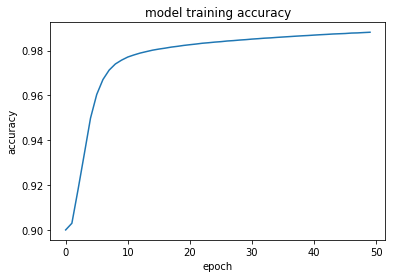

In [72]:
plt.plot(X.history['acc'])
plt.title('model training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')